In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Hotel_Reviews.csv")

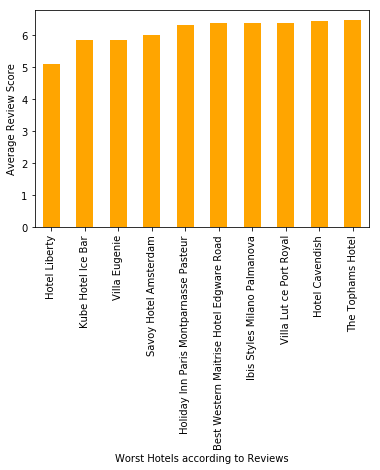

In [3]:
# Worst Hotels
worst_hotels =data.groupby('Hotel_Name')['Reviewer_Score'].mean().sort_values(ascending=True).head(10)
worst_hotels.plot(kind="bar",color="Orange")
_=plt.xlabel('Worst Hotels according to Reviews')
_=plt.ylabel('Average Review Score')
plt.show()

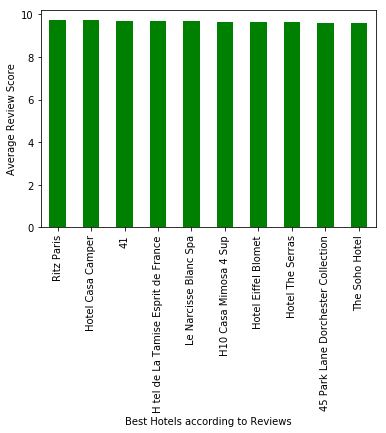

In [4]:
# Best Hotels
best_hotels = data.groupby('Hotel_Name')['Reviewer_Score'].mean().sort_values(ascending=False).head(10)
best_hotels.plot(kind="bar",color = "green")
_=plt.xlabel('Best Hotels according to Reviews')
_=plt.ylabel('Average Review Score')
plt.show()

In [5]:
# Mining some important information
data['Leisure'] = data['Tags'].map(lambda x: 1 if ' Leisure trip ' in x else 0)
data['Business'] = data['Tags'].map(lambda x: 2 if ' Business trip ' in x else 0)
data['Trip_type'] = data['Leisure'] + data['Business']

import random
data['Trip_type'] = data[data['Trip_type'] == 0]['Trip_type'].map(lambda x: 1 if random.random() > 0.2 else 2)
data['Trip_type'] = data['Trip_type'].fillna(0)
data['Trip_type'] = data['Trip_type'] + data['Business'] + data['Leisure']
del data['Leisure'] , data['Business']

Text(0.5,1,'Trip Type')

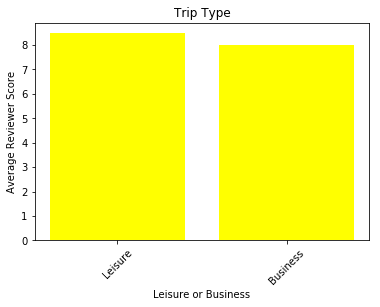

In [7]:
# Let's find the type of Trip
tt_avg=data.groupby('Trip_type')['Reviewer_Score'].mean()
Index = [1,2]
plt.bar(Index,tt_avg,color='Yellow')
plt.xticks(Index,['Leisure','Business'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Leisure or Business')
plt.title('Trip Type')

In [8]:
# Business trips have a lower rarings

In [9]:
# Duration of the Stay
data['Stayed_1_days'] = data['Tags'].map(lambda x: 1 if ' Stayed 1 night ' in x else 0)
data['Stayed_2_days'] = data['Tags'].map(lambda x: 2 if ' Stayed 2 nights ' in x else 0)
data['Stayed_3_days'] = data['Tags'].map(lambda x: 3 if ' Stayed 3 nights ' in x else 0)
data['Stayed_4_days'] = data['Tags'].map(lambda x: 4 if ' Stayed 4 nights ' in x else 0)
data['Stayed_5_days'] = data['Tags'].map(lambda x: 5 if ' Stayed 5 nights ' in x else 0)
data['Stayed_6_days'] = data['Tags'].map(lambda x: 6 if ' Stayed 6 nights ' in x else 0)
data['Stayed_7_days'] = data['Tags'].map(lambda x: 7 if ' Stayed 7 nights ' in x else 0)
data['Stayed_8_days'] = data['Tags'].map(lambda x: 8 if ' Stayed 8 nights ' in x else 0)
data['Stayed_9_days'] = data['Tags'].map(lambda x: 9 if ' Stayed 9 nights ' in x else 0)
data['Stayed_10_days'] = data['Tags'].map(lambda x: 10 if ' Stayed 10 nights ' in x else 0)
data['Stayed_11_days'] = data['Tags'].map(lambda x: 11 if ' Stayed 11 nights ' in x else 0)
data['Stayed_12_days'] = data['Tags'].map(lambda x: 12 if ' Stayed 12 nights ' in x else 0)
data['Stayed_13_days'] = data['Tags'].map(lambda x: 13 if ' Stayed 13 nights ' in x else 0)
data['Stayed_14_days'] = data['Tags'].map(lambda x: 14 if ' Stayed 14 nights ' in x else 0)
data['Stayed_15_days'] = data['Tags'].map(lambda x: 15 if ' Stayed 15 nights ' in x else 0)
data['Stayed_16_days'] = data['Tags'].map(lambda x: 16 if ' Stayed 16 nights ' in x else 0)
data['Stayed_17_days'] = data['Tags'].map(lambda x: 17 if ' Stayed 17 nights ' in x else 0)
data['Stayed_18_days'] = data['Tags'].map(lambda x: 18 if ' Stayed 18 nights ' in x else 0)
data['Stayed_19_days'] = data['Tags'].map(lambda x: 19 if ' Stayed 19 nights ' in x else 0)
data['Stayed_20_days'] = data['Tags'].map(lambda x: 20 if ' Stayed 20 nights ' in x else 0)

In [10]:
data['stayed_days'] = data['Stayed_1_days'] + data['Stayed_2_days'] + data['Stayed_3_days'] + data['Stayed_4_days'] + data['Stayed_5_days'] + data['Stayed_6_days'] + data['Stayed_7_days'] + data['Stayed_8_days'] + data['Stayed_9_days'] + data['Stayed_10_days'] + data['Stayed_11_days'] + data['Stayed_12_days'] + data['Stayed_13_days'] + data['Stayed_14_days'] + data['Stayed_15_days'] + data['Stayed_16_days'] + data['Stayed_17_days'] + data['Stayed_18_days'] + data['Stayed_19_days'] + data['Stayed_20_days']
del data['Stayed_1_days'] , data['Stayed_2_days'] , data['Stayed_3_days'] , data['Stayed_4_days'], data['Stayed_5_days'] , data['Stayed_6_days'] , data['Stayed_7_days'] , data['Stayed_8_days'] , data['Stayed_9_days'] , data['Stayed_10_days'] , data['Stayed_11_days'] , data['Stayed_12_days'] , data['Stayed_13_days'] , data['Stayed_14_days'] , data['Stayed_15_days'] , data['Stayed_16_days'] , data['Stayed_17_days'] , data['Stayed_18_days'] , data['Stayed_19_days'] , data['Stayed_20_days']

In [11]:
data.stayed_days.value_counts()
#Assgining stayings which are over 20 days as 21
data['stayed_days'] = data['stayed_days'].map(lambda x: 21 if x == 0 else x)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

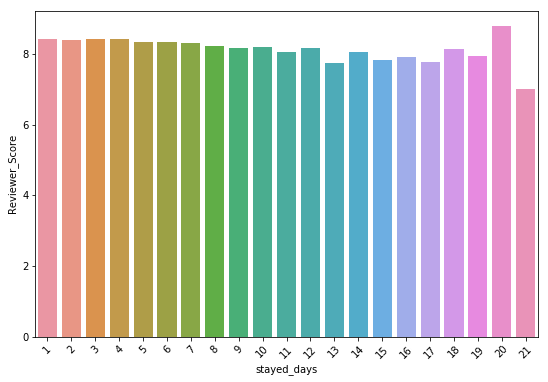

In [12]:
## Stayed_days
stayed_days_hist=data.groupby("stayed_days")['Reviewer_Score'].mean().reset_index().sort_values(by='stayed_days',ascending=False).reset_index(drop=True)
plt.figure(figsize=(9,6))
sns.barplot(x='stayed_days',y='Reviewer_Score', data=stayed_days_hist)
plt.xticks(rotation=45)

In [13]:
# According to General trend, the more the staying, lesser the reviewer_score 